In [5]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import KFold

In [41]:
# NOTE: Load and inspect the pic :)
data = sp.io.loadmat("/home/zebalgebra/School/CDA/05/data/cs.mat")["img"]

In [54]:
# NOTE: Setups for multivariate normal, and other meta stuffs
seed = 6740
rng = np.random.default_rng(seed)
mu = np.zeros(1300)
cov = 25 * np.eye(1300)
n_cv = 10
n_alpha = 20
alphas = np.arange(1, n_alpha + 1) / n_alpha
opts = {
    "fit_intercept": False,
    "random_state": seed,
    "max_iter": 2000,
    "tol": 1e-3,
}

# NOTE: Set up A, Y
x = data.reshape((2500,))
X = rng.random(size=(1300, 2500))
e = rng.multivariate_normal(mu, cov).T
y = X @ x + e

In [55]:
%%time
kf = KFold(n_splits=n_cv, shuffle=True, random_state=seed)
indices = np.arange(1300)
mse_scores = np.zeros((n_cv, n_alpha))
for i, (tr, te) in enumerate(kf.split(indices)):
    X_train = X[tr, :]
    X_test = X[te, :]
    y_train = y[tr]
    y_test = y[te]

    for j, alpha in enumerate(alphas):
        model = Lasso(**opts, alpha=alpha)
        fit = model.fit(X_train, y_train)
        pred = fit.predict(X_test)
        mse = ((pred - y_test) ** 2).sum()
        mse_scores[i, j] = mse
        print(mse)


16393.960141944943
5652.016099828756
5630.369710943852
5801.859547687675
6101.7941160552145
6364.303317086423
6571.330477998943
6834.42616271077
7156.715673521065
7490.794896813222
7829.849928787304
8158.589689940923
8412.587265751537
8762.259264301149
9133.713718329676
9459.73204891346
9775.480992221546
10105.388294401273
10603.510825996029
11057.404812369161
18076.487581395857
8166.740999977372
8047.108219284795
8227.371935363004
8306.323324730101
8305.643342365516
8411.729366302927
8606.314166053731
8849.648387232708
9070.68125419656
9270.612662406282
9501.887400568494
9791.543534918508
10123.763502320327
10430.433594073267
10689.412754978788
10930.964253298942
11151.527869826985
11359.597140383044
11620.030656322087
19033.229770075857
7618.083085016887
7564.680253418694
7573.831252152356
7822.884335396682
7972.416585928437
8050.808560797534
8206.656825907055
8412.572806926515
8650.926429404126
8952.531060260564
9226.576305239798
9599.859402586886
10050.514041132032
10559.2694005786

Text(0.5, 1.0, 'Lasso CV-score for MSE (w.r.t lambda value)')

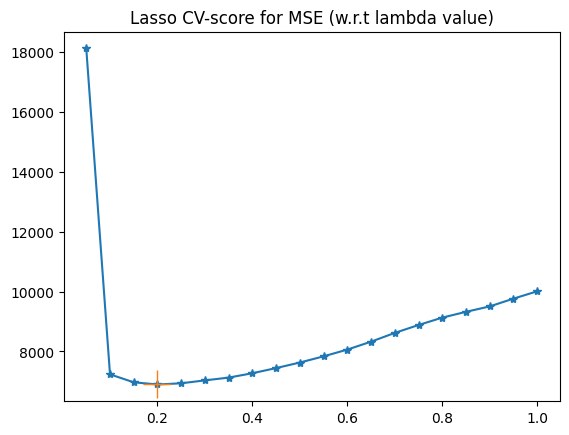

In [57]:
# NOTE: Grep best score
mse_scores = mse_scores.mean(axis=0)
amin = np.argmin(mse_scores)
best_alpha = alphas[amin]
best_mse = mse_scores[amin]
plt.figure()
plt.plot(alphas, mse_scores, marker="*")
plt.plot(best_alpha, best_mse, marker="+", markersize=20)
plt.title("Lasso CV-score for MSE (w.r.t lambda value)")

In [59]:
# NOTE: Reconstruct image based on best_alpha
opts["max_iter"] = 20000
opts["tol"] = 1e-4
model = Lasso(**opts, alpha=best_alpha)
fit = model.fit(X, y)
pred = fit.coef_.reshape((50, 50))
plt.figure()

TypeError: imshow() got multiple values for argument 'cmap'

<Figure size 640x480 with 0 Axes>

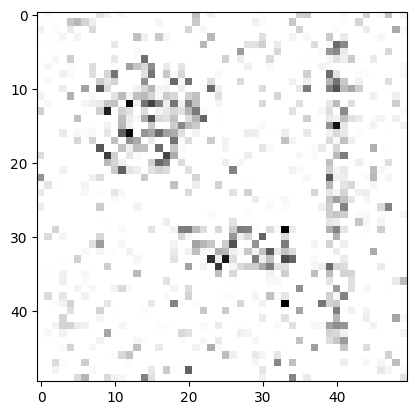

In [61]:
plt.imshow(pred, cmap="Greys")